# **Transfer Learning**

## **1. Feature Extraction**

In [57]:
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from keras.layers import Dense,Flatten,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16

In [58]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False, # take only conv_base
    input_shape = (150,150,3)
)

In [59]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Create the model
model = Sequential()

# Add the pre-trained convolutional base
model.add(conv_base)  

# Flatten the output from the convolutional base
model.add(Flatten())

# Fully Connected Layers with Batch Normalization and Dropout
model.add(Dense(128, activation='relu'))  
model.add(BatchNormalization())  
model.add(Dropout(0.5))  

model.add(Dense(64, activation='relu'))  
model.add(BatchNormalization())  
model.add(Dropout(0.5))  
# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,772,481 (60.17 MB)

 Trainable params: 15,772,097 (60.17 MB)

 Non-trainable params: 384 (1.50 KB)

In [62]:
# Freeze the Conv_base layers
conv_base.trainable = False 

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds= train_datagen.flow_from_directory(
        'Cats_Dogs/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_ds = test_datagen.flow_from_directory(
        'Cats_Dogs/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [64]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [65]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.5875 - loss: 0.8841 - val_accuracy: 0.5429 - val_loss: 0.9579
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.7596 - loss: 0.5089 - val_accuracy: 0.5786 - val_loss: 1.1370
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.7936 - loss: 0.4271 - val_accuracy: 0.6143 - val_loss: 1.0629
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.8073 - loss: 0.3838 - val_accuracy: 0.6643 - val_loss: 0.9345
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8195 - loss: 0.3828 - val_accuracy: 0.6786 - val_loss: 0.8443
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8160 - loss: 0.4045 - val_accuracy: 0.7214 - val_loss: 0.8077
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.8535 - loss: 0.3184 - val_accuracy: 0.7500 - val_loss: 0.5359
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8528 - loss: 0.3333 - val_accuracy: 0.7643 - val_loss: 0.541

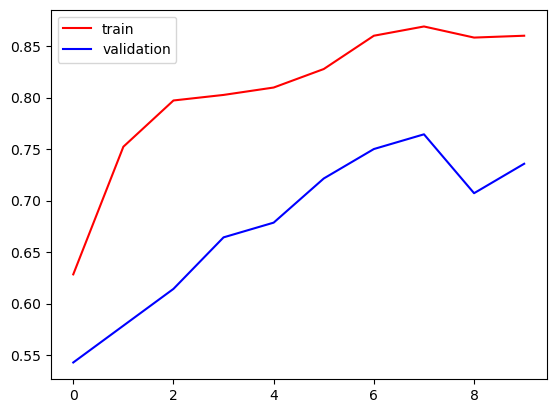

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

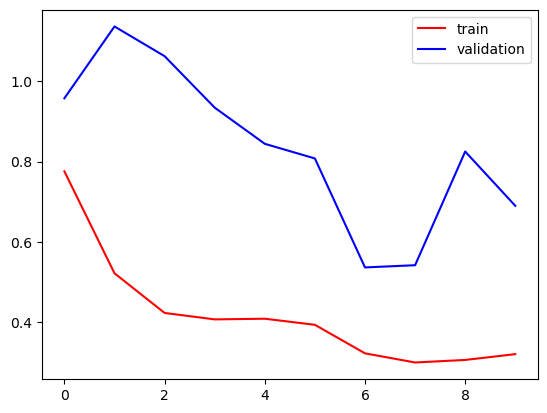

In [67]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## **2. Fine Tuning**

In [68]:
conv_base2 = VGG16(
    weights = 'imagenet',
    include_top = False, # take only conv_base
    input_shape = (150,150,3)
)

In [69]:
conv_base2.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
conv_base2.trainable = True
set_trainable = False

for layer in conv_base2.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base2.layers:
    print(layer.name,layer.trainable)

input_layer_14 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [71]:
conv_base2.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [72]:
model1 = Sequential()

model1.add(conv_base)

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(BatchNormalization())  
model1.add(Dropout(0.5)) 

model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())  
model1.add(Dropout(0.5))  


model1.add(Dense(1,activation='sigmoid'))

In [73]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [74]:
history1 = model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.5813 - loss: 0.8681 - val_accuracy: 0.5786 - val_loss: 0.9883
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.7609 - loss: 0.5134 - val_accuracy: 0.6714 - val_loss: 0.7520
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.7894 - loss: 0.4656 - val_accuracy: 0.6643 - val_loss: 0.8295
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.8169 - loss: 0.4028 - val_accuracy: 0.6714 - val_loss: 0.7703
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.8462 - loss: 0.3494 - val_accuracy: 0.7357 - val_loss: 0.5903
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.8496 - loss: 0.3754 - val_accuracy: 0.7500 - val_loss: 0.4681
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.8575 - loss: 0.3303 - val_accuracy: 0.7500 - val_loss: 0.5194
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.8782 - loss: 0.2678 - val_accuracy: 0.7071 - val_lo

[]

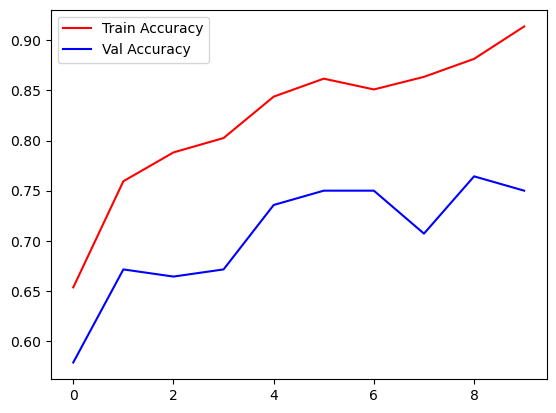

In [75]:
plt.plot(history1.history['accuracy'],color = 'red',label ='Train Accuracy')
plt.plot(history1.history['val_accuracy'],color = 'blue',label ='Val Accuracy')
plt.legend()
plt.plot()

[]

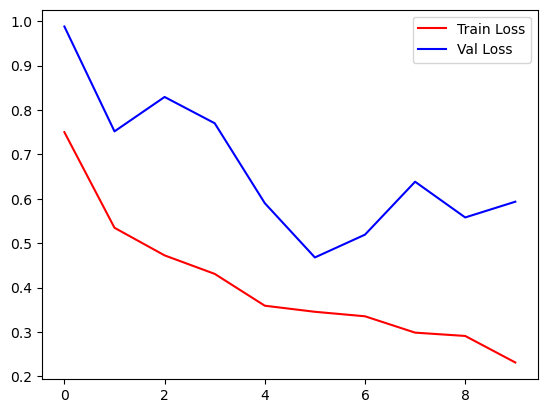

In [76]:
plt.plot(history1.history['loss'],color = 'red',label ='Train Loss')
plt.plot(history1.history['val_loss'],color = 'blue',label ='Val Loss')
plt.legend()
plt.plot()